# Примеры использования

In [238]:
load("../src/dps.sage")

Необходимо задать схему в виде правой части дифференциального уравнения 
$$
\frac{dx}{dt} = F(\hat{x}, x, dt)
$$
В качестве исходной функции нужно задать [формальную функцию](https://doc.sagemath.org/html/en/reference/calculus/sage/symbolic/function_factory.html). Обратите внимание, что:

In [239]:
var('x')
function('f') == function('f')(x)

False

## Коэффициенты

### Неявная схема

In [240]:
var('xx,x,t')
a_param = var(['a'] +['a' + str(i) for i in range(100)] + ['b'] + ['b' + str(i) for i in range(10)])
f = function('f', nargs = 1)
F = a0*f(xx) + a1*f(x)

In [241]:
s = Scheme([x,t],[f,None],a_param, F, order = 2, n_val = xx)
s.latex()

\frac{dx}{dt} = a_{1} f\left(x\right) + a_{0} f\left(\mathit{xx}\right)


$$\frac{dx}{dt} = a_{1} f\left(x\right) + a_{0} f\left(\mathit{xx}\right)$$

In [242]:
s.parametric_eqs(right = x^2 + 1)

[x == x,
 x^2 + 1 == (a0 + a1)*x^2 + a0 + a1,
 x^3 + x == 2*(a0^2 + a0*a1)*x^3 + 2*(a0^2 + a0*a1)*x]

$$\begin{cases}
 a_{0} - \frac{1}{2},\\a_{1} - \frac{1}{2},\\ 
\end{cases}
$$

Для рассчета коэффициентов выберем функцию $x^2 + 1$

In [243]:
s.coefficients(right = x^2 + 1)

[a0 - 1/2, a1 - 1/2]

### Явная схема Рунге-Кутты 4-го порядка

In [244]:
def rk4():
    k1 = f(x)
    k2 = f(x + k1*dt*a21)
    k3 = f(x + k1*dt*a31 + k2*dt*a32)
    k4 = f(x + k1*dt*a41 + k2*dt*a42 + k3*dt*a43)
    return b1*k1 + b2*k2 + b3*k3 + b4*k4

In [245]:
s = Scheme([x,t], [f,None], a_param, rk4(), order = 4)
s.parametric_eqs()

[x == x,
 f(x) == (b1 + b2 + b3 + b4)*f(x),
 1/2*f(x)*diff(f(x), x) == (a21*b2 + (a31 + a32)*b3 + (a41 + a42 + a43)*b4)*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == (a21*a32*b3 + (a21*a42 + (a31 + a32)*a43)*b4)*f(x)*diff(f(x), x)^2 + 1/2*(a21^2*b2 + (a31^2 + 2*a31*a32 + a32^2)*b3 + (a41^2 + 2*a41*a42 + a42^2 + 2*(a41 + a42)*a43 + a43^2)*b4)*f(x)^2*diff(f(x), x, x),
 1/24*f(x)*diff(f(x), x)^3 + 1/6*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/24*f(x)^3*diff(f(x), x, x, x) == a21*a32*a43*b4*f(x)*diff(f(x), x)^3 + 1/2*((2*a21*a32^2 + (a21^2 + 2*a21*a31)*a32)*b3 + (2*a21*a42^2 + 2*(a31 + a32)*a43^2 + (a21^2 + 2*a21*a41)*a42 + (a31^2 + 2*a31*a32 + a32^2 + 2*(a31 + a32)*a41 + 2*(a21 + a31 + a32)*a42)*a43)*b4)*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/6*(a21^3*b2 + (a31^3 + 3*a31^2*a32 + 3*a31*a32^2 + a32^3)*b3 + (a41^3 + 3*a41^2*a42 + 3*a41*a42^2 + a42^3 + 3*(a41 + a42)*a43^2 + a43^3 + 3*(a41^2 + 2*a41*a42 + a42^2)*a43)*b4)*f(x)^3*diff(f(x), x, x, x)]

In [246]:
s.parametric_eqs(x^3 - 2)

[x == x,
 x^3 - 2 == (b1 + b2 + b3 + b4)*x^3 - 2*b1 - 2*b2 - 2*b3 - 2*b4,
 3/2*x^5 - 3*x^2 == 3*(a21*b2 + (a31 + a32)*b3 + (a41 + a42 + a43)*b4)*x^5 - 6*(a21*b2 + (a31 + a32)*b3 + (a41 + a42 + a43)*b4)*x^2,
 5/2*x^7 - 7*x^4 + 4*x == 3*(a21^2*b2 + (a31^2 + (3*a21 + 2*a31)*a32 + a32^2)*b3 + (a41^2 + (3*a21 + 2*a41)*a42 + a42^2 + (3*a31 + 3*a32 + 2*a41 + 2*a42)*a43 + a43^2)*b4)*x^7 - 6*(2*a21^2*b2 + (2*a31^2 + (3*a21 + 4*a31)*a32 + 2*a32^2)*b3 + (2*a41^2 + (3*a21 + 4*a41)*a42 + 2*a42^2 + (3*a31 + 3*a32 + 4*a41 + 4*a42)*a43 + 2*a43^2)*b4)*x^4 + 12*(a21^2*b2 + (a31^2 + 2*a31*a32 + a32^2)*b3 + (a41^2 + 2*a41*a42 + a42^2 + 2*(a41 + a42)*a43 + a43^2)*b4)*x,
 35/8*x^9 - 63/4*x^6 + 15*x^3 - 2 == (a21^3*b2 + (a31^3 + 3*(6*a21 + a31)*a32^2 + a32^3 + 3*(3*a21^2 + 6*a21*a31 + a31^2)*a32)*b3 + (a41^3 + 3*(6*a21 + a41)*a42^2 + a42^3 + 3*(6*a31 + 6*a32 + a41 + a42)*a43^2 + a43^3 + 3*(3*a21^2 + 6*a21*a41 + a41^2)*a42 + 3*(3*a31^2 + 3*(3*a21 + 2*a31)*a32 + 3*a32^2 + 6*(a31 + a32)*a41 + a41^2 + 2*(3*a21 +

In [247]:
s.coefficients(right = x)

[a21*a32*a43*b4 - 1/24, a21*a32*b3 + a21*a42*b4 + a31*a43*b4 + a32*a43*b4 - 1/6, a21*a42*a43*b4^2 + a31*a43^2*b4^2 + a32*a43^2*b4^2 - 1/6*a43*b4 + 1/24*b3, a21*b2 + a31*b3 + a32*b3 + a41*b4 + a42*b4 + a43*b4 - 1/2, a31*a32*a43^2*b4^2 + a32^2*a43^2*b4^2 - 1/6*a32*a43*b4 + 1/24*a32*b3 + 1/24*a42*b4, a31*a32*a43*b3*b4 + a32^2*a43*b3*b4 + a32*a41*a43*b4^2 + a32*a42*a43*b4^2 + a32*a43^2*b4^2 - 1/2*a32*a43*b4 + 1/24*b2, a31*a32*b3^2 + a31*a42*b3*b4 - a31*a43*b2*b4 + a32^2*b3^2 + a32*a41*b3*b4 + 2*a32*a42*b3*b4 - a32*a43*b2*b4 + a32*a43*b3*b4 - 1/2*a32*b3 + a41*a42*b4^2 + a42^2*b4^2 + a42*a43*b4^2 - 1/2*a42*b4 + 1/6*b2, a31*a42*a43*b3*b4^2 - a31*a43^2*b2*b4^2 + a32*a42*a43*b3*b4^2 - a32*a43^2*b2*b4^2 + a41*a42*a43*b4^3 + a42^2*a43*b4^3 + a42*a43^2*b4^3 - 1/2*a42*a43*b4^2 + 1/6*a43*b2*b4 - 1/24*b2*b3, a32*a41*a43^2*b4^3 + a32*a42*a43^2*b4^3 + a32*a43^3*b4^3 - 1/2*a32*a43^2*b4^2 + 1/6*a32*a43*b3*b4 - 1/24*a32*b3^2 - 1/24*a42*b3*b4 + 1/24*a43*b2*b4, b1 + b2 + b3 + b4 - 1]

In [248]:
s.coef_latex(x)

\begin{cases}
 a_{21} a_{32} a_{43} b_{4} - \frac{1}{24},\\
a_{21} a_{32} b_{3} + a_{21} a_{42} b_{4} + a_{31} a_{43} b_{4} + a_{32} a_{43} b_{4} - \frac{1}{6},\\
a_{21} a_{42} a_{43} b_{4}^{2} + a_{31} a_{43}^{2} b_{4}^{2} + a_{32} a_{43}^{2} b_{4}^{2} - \frac{1}{6} a_{43} b_{4} + \frac{1}{24} b_{3},\\
a_{21} b_{2} + a_{31} b_{3} + a_{32} b_{3} + a_{41} b_{4} + a_{42} b_{4} + a_{43} b_{4} - \frac{1}{2},\\
a_{31} a_{32} a_{43}^{2} b_{4}^{2} + a_{32}^{2} a_{43}^{2} b_{4}^{2} - \frac{1}{6} a_{32} a_{43} b_{4} + \frac{1}{24} a_{32} b_{3} + \frac{1}{24} a_{42} b_{4},\\
a_{31} a_{32} a_{43} b_{3} b_{4} + a_{32}^{2} a_{43} b_{3} b_{4} + a_{32} a_{41} a_{43} b_{4}^{2} + a_{32} a_{42} a_{43} b_{4}^{2} + a_{32} a_{43}^{2} b_{4}^{2} - \frac{1}{2} a_{32} a_{43} b_{4} + \frac{1}{24} b_{2},\\
a_{31} a_{32} b_{3}^{2} + a_{31} a_{42} b_{3} b_{4} - a_{31} a_{43} b_{2} b_{4} + a_{32}^{2} b_{3}^{2} + a_{32} a_{41} b_{3} b_{4} + 2 a_{32} a_{42} b_{3} b_{4} - a_{32} a_{43} b_{2} b_{4} + a_{32} a_{43} b_{3

$$
\begin{cases}
 a_{21} a_{32} a_{43} b_{4} - \frac{1}{24},\\
a_{21} a_{32} b_{3} + a_{21} a_{42} b_{4} + a_{31} a_{43} b_{4} + a_{32} a_{43} b_{4} - \frac{1}{6},\\
a_{21} a_{42} a_{43} b_{4}^{2} + a_{31} a_{43}^{2} b_{4}^{2} + a_{32} a_{43}^{2} b_{4}^{2} - \frac{1}{6} a_{43} b_{4} + \frac{1}{24} b_{3},\\
a_{21} b_{2} + a_{31} b_{3} + a_{32} b_{3} + a_{41} b_{4} + a_{42} b_{4} + a_{43} b_{4} - \frac{1}{2},\\
a_{31} a_{32} a_{43}^{2} b_{4}^{2} + a_{32}^{2} a_{43}^{2} b_{4}^{2} - \frac{1}{6} a_{32} a_{43} b_{4} + \frac{1}{24} a_{32} b_{3} + \frac{1}{24} a_{42} b_{4},\\
a_{31} a_{32} a_{43} b_{3} b_{4} + a_{32}^{2} a_{43} b_{3} b_{4} + a_{32} a_{41} a_{43} b_{4}^{2} + a_{32} a_{42} a_{43} b_{4}^{2} + a_{32} a_{43}^{2} b_{4}^{2} - \frac{1}{2} a_{32} a_{43} b_{4} + \frac{1}{24} b_{2},\\
a_{31} a_{32} b_{3}^{2} + a_{31} a_{42} b_{3} b_{4} - a_{31} a_{43} b_{2} b_{4} + a_{32}^{2} b_{3}^{2} + a_{32} a_{41} b_{3} b_{4} + 2 a_{32} a_{42} b_{3} b_{4} - a_{32} a_{43} b_{2} b_{4} + a_{32} a_{43} b_{3} b_{4} - \frac{1}{2} a_{32} b_{3} + a_{41} a_{42} b_{4}^{2} + a_{42}^{2} b_{4}^{2} + a_{42} a_{43} b_{4}^{2} - \frac{1}{2} a_{42} b_{4} + \frac{1}{6} b_{2},\\
a_{31} a_{42} a_{43} b_{3} b_{4}^{2} - a_{31} a_{43}^{2} b_{2} b_{4}^{2} + a_{32} a_{42} a_{43} b_{3} b_{4}^{2} - a_{32} a_{43}^{2} b_{2} b_{4}^{2} + a_{41} a_{42} a_{43} b_{4}^{3} + a_{42}^{2} a_{43} b_{4}^{3} + a_{42} a_{43}^{2} b_{4}^{3} - \frac{1}{2} a_{42} a_{43} b_{4}^{2} + \frac{1}{6} a_{43} b_{2} b_{4} - \frac{1}{24} b_{2} b_{3},\\
a_{32} a_{41} a_{43}^{2} b_{4}^{3} + a_{32} a_{42} a_{43}^{2} b_{4}^{3} + a_{32} a_{43}^{3} b_{4}^{3} - \frac{1}{2} a_{32} a_{43}^{2} b_{4}^{2} + \frac{1}{6} a_{32} a_{43} b_{3} b_{4} - \frac{1}{24} a_{32} b_{3}^{2} - \frac{1}{24} a_{42} b_{3} b_{4} + \frac{1}{24} a_{43} b_{2} b_{4},\\
b_{1} + b_{2} + b_{3} + b_{4} - 1,\\
 \end{cases}
$$

Проверим известный набор коэффициентов

In [249]:
C = {
    a3: 1/6,
    a4: 1/3,
    a5: 1/3,
    a6: 1/6,
    a1: 1/2,
    a0: 1/2,
    a2: 1
}
s = Scheme([x,t],[f,None], a_param, rk4().subs(C), order = 4)
s.parametric_eqs()

[x == x,
 f(x) == (b1 + b2 + b3 + b4)*f(x),
 1/2*f(x)*diff(f(x), x) == (a21*b2 + (a31 + a32)*b3 + (a41 + a42 + a43)*b4)*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == (a21*a32*b3 + (a21*a42 + (a31 + a32)*a43)*b4)*f(x)*diff(f(x), x)^2 + 1/2*(a21^2*b2 + (a31^2 + 2*a31*a32 + a32^2)*b3 + (a41^2 + 2*a41*a42 + a42^2 + 2*(a41 + a42)*a43 + a43^2)*b4)*f(x)^2*diff(f(x), x, x),
 1/24*f(x)*diff(f(x), x)^3 + 1/6*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/24*f(x)^3*diff(f(x), x, x, x) == a21*a32*a43*b4*f(x)*diff(f(x), x)^3 + 1/2*((2*a21*a32^2 + (a21^2 + 2*a21*a31)*a32)*b3 + (2*a21*a42^2 + 2*(a31 + a32)*a43^2 + (a21^2 + 2*a21*a41)*a42 + (a31^2 + 2*a31*a32 + a32^2 + 2*(a31 + a32)*a41 + 2*(a21 + a31 + a32)*a42)*a43)*b4)*f(x)^2*diff(f(x), x)*diff(f(x), x, x) + 1/6*(a21^3*b2 + (a31^3 + 3*a31^2*a32 + 3*a31*a32^2 + a32^3)*b3 + (a41^3 + 3*a41^2*a42 + 3*a41*a42^2 + a42^3 + 3*(a41 + a42)*a43^2 + a43^3 + 3*(a41^2 + 2*a41*a42 + a42^2)*a43)*b4)*f(x)^3*diff(f(x), x, x, x)]

In [250]:
s.coefficients(right = x)

[a21*a32*a43*b4 - 1/24, a21*a32*b3 + a21*a42*b4 + a31*a43*b4 + a32*a43*b4 - 1/6, a21*a42*a43*b4^2 + a31*a43^2*b4^2 + a32*a43^2*b4^2 - 1/6*a43*b4 + 1/24*b3, a21*b2 + a31*b3 + a32*b3 + a41*b4 + a42*b4 + a43*b4 - 1/2, a31*a32*a43^2*b4^2 + a32^2*a43^2*b4^2 - 1/6*a32*a43*b4 + 1/24*a32*b3 + 1/24*a42*b4, a31*a32*a43*b3*b4 + a32^2*a43*b3*b4 + a32*a41*a43*b4^2 + a32*a42*a43*b4^2 + a32*a43^2*b4^2 - 1/2*a32*a43*b4 + 1/24*b2, a31*a32*b3^2 + a31*a42*b3*b4 - a31*a43*b2*b4 + a32^2*b3^2 + a32*a41*b3*b4 + 2*a32*a42*b3*b4 - a32*a43*b2*b4 + a32*a43*b3*b4 - 1/2*a32*b3 + a41*a42*b4^2 + a42^2*b4^2 + a42*a43*b4^2 - 1/2*a42*b4 + 1/6*b2, a31*a42*a43*b3*b4^2 - a31*a43^2*b2*b4^2 + a32*a42*a43*b3*b4^2 - a32*a43^2*b2*b4^2 + a41*a42*a43*b4^3 + a42^2*a43*b4^3 + a42*a43^2*b4^3 - 1/2*a42*a43*b4^2 + 1/6*a43*b2*b4 - 1/24*b2*b3, a32*a41*a43^2*b4^3 + a32*a42*a43^2*b4^3 + a32*a43^3*b4^3 - 1/2*a32*a43^2*b4^2 + 1/6*a32*a43*b3*b4 - 1/24*a32*b3^2 - 1/24*a42*b3*b4 + 1/24*a43*b2*b4, b1 + b2 + b3 + b4 - 1]

### Дифференциально-параметрическая схема 3-го порядкаx

In [251]:
!git clone https://github.com/malykhmd/fdm
%cd fdm
load('fdm.sage')
%cd ..
!rm -rf fdm/ 

Cloning into 'fdm'...
remote: Enumerating objects: 332, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 332 (delta 101), reused 172 (delta 93), pack-reused 151
Receiving objects: 100% (332/332), 4.56 MiB | 448.00 KiB/s, done.
Resolving deltas: 100% (177/177), done.
/Users/daddy/projects/dps/examples/fdm
/Users/daddy/projects/dps/examples


$$
\left \{ \begin{aligned} &
\frac{d}{dt} x = y , \quad  \frac{d}{dt} y = -x , \\ &
x (0)= 0 , \quad y (0)= 1
\end{aligned} \right.
$$

In [252]:
var("x1,x2")
pr1 = Initial_problem([x1,x2],[x2,-x1],[0,1],10)

In [253]:
L = function('L') # оператор
dp3 = F = a0*f(x)+ a1*L(f(x))*dt + a2*f(x + a3*f(x)*dt + a4*L(f(x))*dt^2)

In [254]:
s = Scheme([x,t],[f,L],a_param, dp3, order = 3)
s.parametric_eqs()

[x == x,
 f(x) == (a0 + a2)*f(x),
 1/2*f(x)*diff(f(x), x) == (a2*a3 + a1)*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == 1/2*a2*a3^2*f(x)^2*diff(f(x), x, x) + a2*a4*f(x)*diff(f(x), x)^2]

Тогда:

In [255]:
C1 = {
    a0: 6/9,
    a1: 1/6,
    a2: 3/9,
    a3: 1,
    a4: 1/2
}
C2 = {
    a0: 1/4,
    a1: 0,
    a2: 3/4,
    a3: 2/3,
    a4: 2/9
}

In [256]:
s_subs_1 = Scheme([x,t],[f,L],a_param, dp3.subs(C1), order = 3)
s_subs_1.parametric_eqs()

[x == x,
 f(x) == f(x),
 1/2*f(x)*diff(f(x), x) == 1/2*f(x)*diff(f(x), x),
 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x) == 1/6*f(x)*diff(f(x), x)^2 + 1/6*f(x)^2*diff(f(x), x, x)]

In [257]:
s_subs = Scheme([x,t],[f,L],a_param, dp3.subs(C2), order = 3)
s_subs.coefficients(-x)

[0]

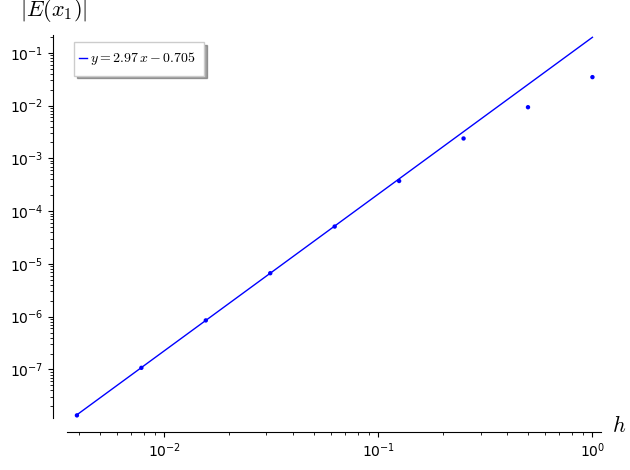

In [258]:
pic = richardson_plot([dps(pr1, s, C1, N=10*2^n) for n in range(10)],x1,10, nmin=5, nmax=7); pic

### Дифференциально-параметрическая схема 4-го порядка

In [259]:
F = a0*f(x)+ a1*L(f(x))*dt +\
    a2*f(x + a3*f(x)*dt + a4*L(f(x))*dt^2) +\
    a4*f(x + a5*f(x)*dt + a6*L(f(x))*dt^2 + a7*L(L(f(x)))*dt^3) 

In [260]:
s = Scheme([x,t],[f,L],a_param, F, order = 4)
s.coefficients(right = x)

[a0 + a4 - a6 + 4*a7 - 1, a1 - a3*a6 + 4*a3*a7 + a4*a5 - 1/2, a2 + a6 - 4*a7, a4*a7 - 1/24]

In [261]:
C = {
    a0: 1/2,
    a1: 5/24,
    a2: 1/4,
    a3: 2/3,
    a4: 1/4,
    a5: 1/2,
    a6: 5/12,
    a7: 1/6,
}

In [262]:
sol = dps(pr1, s, C, N = 50)

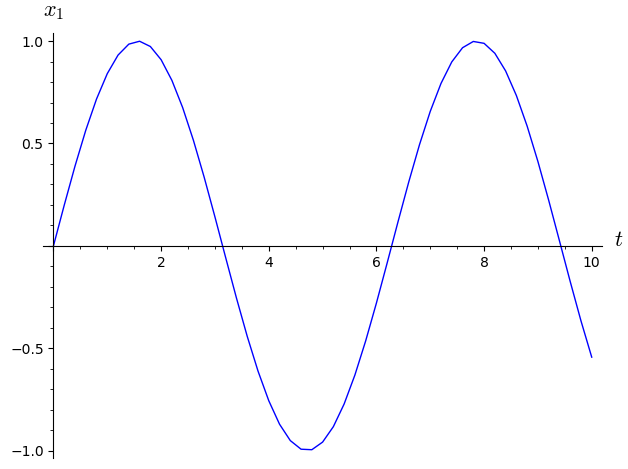

In [263]:
sol.plot(t,x1)

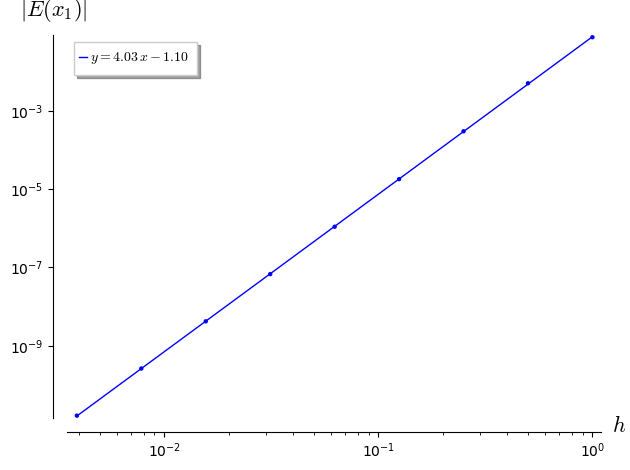

In [264]:
richardson_plot([dps(pr1, s, C, N=10*2^n) for n in range(10)],x1,10)

### Схема Шанкса

In [265]:
def shanks():
    f0 = f(x)
    f1 = f(x + (1/192)*f0*dt)
    f2 = f(x + (1/6)*dt*(-15*f0 + 16*f1))
    f3 = f(x + (1/186)*dt*(4867*f0 - 5072*f1 + 298*f2))
    f4 = f(x + (1/31)*dt*(-19995*f0 + 20896*f1 - 1025*f2 + 155*f3))
    f5 = f(x + (1/5022)*dt*(-469805*f0 + 490960*f1 - 22736*f2 + 5580*f3 + 186*f4))
    f6 = f(x + (1/2604)*dt*(914314*f0 - 955136*f1 + 47983*f2 - 6510*f3 - 558*f4 + 2511*f5))
    return (1/300)*(14*f0 + 0*f1 + 81*f2 + 110*f3 + 0*f4 + 81*f5 + 14*f6)

In [266]:
f = function('f')

In [267]:
s = Scheme([x,t],[f,L],a_param, shanks(), order = 7)

In [268]:
s.parametric_eqs(x)

[x == x,
 x == x,
 1/2*x == 1/2*x,
 1/6*x == 1/6*x,
 1/24*x == 1/24*x,
 1/120*x == 1/120*x,
 1/720*x == 1/720*x,
 1/5040*x == 149/803520*x]

In [269]:
RR(1/5040)

0.000198412698412698

In [270]:
RR(149/803520)

0.000185434090003982

In [271]:
TS = Butcher_tableau(7,[[[0,0,0,0,0,0,0],\
                         [1/192,0,0,0,0,0,0],\
                         [-15/6,16/6,0,0,0,0,0],\
                         [4867/186, -5072/186, 298/186, 0, 0, 0,0],\
                         [-19995/31, 20896/31, -1025/31, 155/31, 0, 0, 0],\
                         [-469805/5022, 490960/5022, -22736/5022, 5580/5022, 186/5022, 0, 0],\
                         [914314/2604, -955136/2604, 47983/2604, - 6510/2604, -558/2604, 2511/2604, 0]],\
                        [14/300, 0, 81/300, 110/300, 0, 81/300, 14/300]],'7-7','Shanks')

In [272]:
G = [erk(pr1,N=10*2^n, tableau = TS) for n in range(10)]

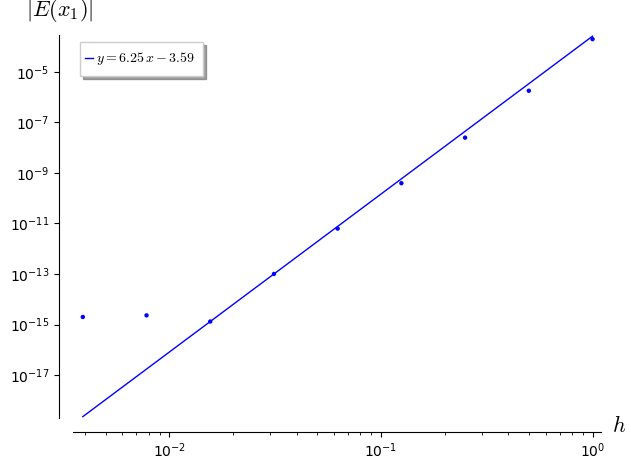

In [273]:
richardson_plot(G ,x1,10, nmin = 5, nmax = 7)

$$
\left \{ \begin{aligned} &
\frac{d}{dt} q_{0} = p_{0} , \quad \frac{d}{dt} q_{1} = p_{1} , \quad \frac{d}{dt} q_{2} = p_{2} , \quad \frac{d}{dt} p_{0} = -\frac{6}{5} \, q_{0} - \frac{1}{5} \, q_{1} - \frac{1}{5} \, q_{2} , \quad \frac{d}{dt} p_{1} = -\frac{1}{5} \, q_{0} - \frac{6}{5} \, q_{1} - \frac{1}{5} \, q_{2} , \quad  \frac{d}{dt} p_{2} = -\frac{1}{5} \, q_{0} - \frac{1}{5} \, q_{1} - \frac{6}{5} \, q_{2} , \\ &
q_{0} (0)= 0 , \quad q_{1} (0)= 1 , \quad q_{2} (0)= 4 , \quad p_{0} (0)= 0 , \quad p_{1} (0)= 0 , \quad p_{2} (0)= 0
\end{aligned} \right. 
$$

In [274]:
n=3
a=1
b=1/10

In [275]:
var("t")
q=var(['q'+str(i) for i in range(n)])
p=var(['p'+str(i) for i in range(n)])
H=sum([i^2 for i in p])/2 + sum([b*i*j for i in q for j in q]) + sum([a*i^2 for i in q])/2

In [276]:
q0=[i^2 for i in range(n)]
p0=[0 for i in range(n)]

In [277]:
pr=Initial_problem(list(q+p),[diff(H,i) for i in p]+[-diff(H,i) for i in q],q0+p0, 20)

In [278]:
G = [erk(pr,N=10*2^n, tableau = TS) for n in range(10)]

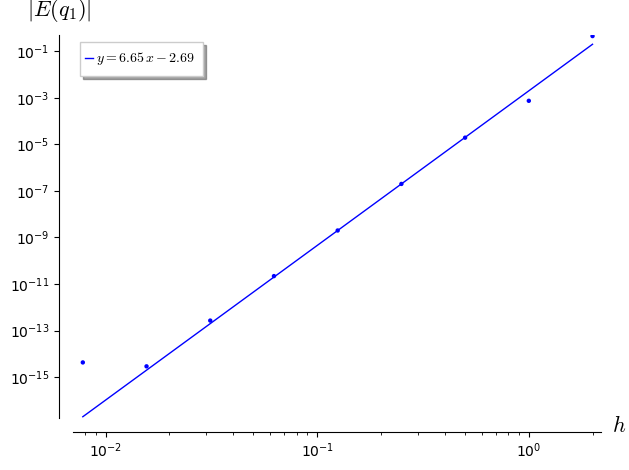

In [279]:
richardson_plot(G,q1,20, nmin = 3, nmax = 5)

### Схемы большого порядка(??)

In [280]:
C = {
    a0: 1/6,
    a2: 1/6,
    a5: 1/6,
    a9: 1/6,
    a14: 1/6,
    a19: 1/6,
    a22: 1/840,
    a18: 1/120,
    a13: 1/20,
    a8: 1/16,
    a12: 1/16,
    a17: 1/16,
    a21: 1/16,
    a4: 10/16,
    a7: 2/16,
    a11: 2/16,
    a16: 1/16,
    a1: 1/2,
    a3: 1,
    a6: 1,
    a10: 1,
    a15: -2,
    a20: -1
}
F = a0*f(x)+ a1*L(f(x))*dt +\
    a2*f(x + a3*f(x)*dt + a4*L(f(x))*dt^2) +\
    a5*f(x + a6*f(x)*dt + a7*L(f(x))*dt^2 + a8*L(L(f(x)))*dt^3) +\
    a9*f(x + a10*f(x)*dt + a11*L(f(x))*dt^2 + a12*L(L(f(x)))*dt^3 + a13*L(L(L(f(x))))*dt^4) +\
    a14*f(x + a15*f(x)*dt + a16*L(f(x))*dt^2 + a17*L(L(f(x)))*dt^3 + a18*L(L(L(L(f(x)))))*dt^5) +\
    a19*f(x + a20*f(x)*dt + a21*L(f(x))*dt^2 + a21*L(L(f(x)))*dt^3 + a22*L(L(L(L(L(f(x))))))*dt^6)
s = Scheme([x,t],[f,L],a_param, F.subs(C), order = 7)
s.coefficients(right = x)

[0]

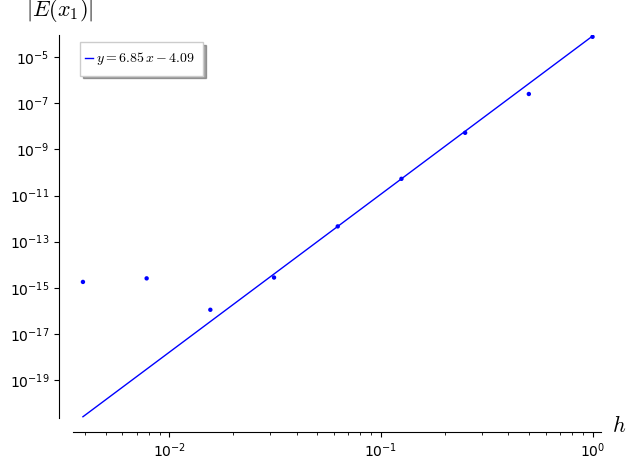

In [281]:
richardson_plot([dps(pr1, s, C, N=10*2^n) for n in range(10)], x1, 10, nmin=3, nmax=5)